# Analysis 1

## Setup

### External libraries

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import copy

### Project modules

In [8]:
cd ..

/home/jarom/school/NatComp/project


/home/jarom/.local/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [9]:
from population import Population, Initialization
from simulation import Simulation
from plotting import *
from geometry import *
from election import Election
from agents import Voter, Candidate, System, Strategy, Approach

#### Parameters

In [10]:
params = {
    # Election parameters
    "system" : System.INSTANT_RUNOFF,   # Electoral system, one of FPTP INSTANT_RUNOFF APPROVAL
    "threshold" : 0.1,                  # Percentage threshold for getting elected to the parliament
    "dist_metric" : distance_euclid,    # Distance metric
    # Simulation parameters
    "n_rounds": 10,             # Number of election rounds
    "n_polls": 5,               # Number of polling rounds between elections
    # Population parameters
    "dimension": 2,             # Dimension of the space in which voters and candidates are located
    "low": -1,                  # Lower bound for the uniform distribution of voter positions
    "high": 1,                  # Upper bound for the uniform distribution of voter positions
    "mu": 0,                    # Mean for the normal distribution of voter positions
    "sigma": 1,
    "cand_dist": Initialization.UNIFORM,    # Distribution type for candidate positions: UNIFORM NORMAL CLUSTER CUSTOM
    "n_candidates": 10,                     # Number of candidates in the election
    "cand_approach_dist": {
        Approach.RANDOM : 0.05,
        Approach.HONEST : 0.45,
        Approach.DEFENSIVE : 0.25,
        Approach.OFFENSIVE : 0.25
    },
    "voter_dist": Initialization.UNIFORM,   # Distribution type for voter positions: UNIFORM NORMAL CLUSTER CUSTOM
    "n_voters": 200,                        # Number of voters in the population
    "voter_strat_dist": {
        Strategy.RANDOM : 0.05,
        Strategy.HONEST : 0.10,
        Strategy.POPULIST : 0.10,
        Strategy.REALIST : 0.50,
        Strategy.LOYAL : 0.25,
    },
    "use_local_neighborhood": False,         # Whether to use local neighborhood for updating voter opinions
    "neighborhood_radius": 0.2,             # Radius for the local neighborhood around
    "per_polls": 0.1,                       # Percentage of the subsample size when polling
    # Voter parameters
    "best_preference": 1.0,     # Weight of distance to best candidate for toleration radius
    "worst_tolerance": 0.8,     # Weight of distance to worst candidate for toleration radius
    "campaign_weight": 0.4,     # Weight of campaign message in the voter's decision
    "poll_weight": 0.2,         # Weight of polls in the voter's decision
    "social_weight": 0.6,       # Weight of social influence in the voter's decision
    # Candidate parameters
    "approach_weight": 0.005,   # Weight of the approach in the candidate's position update
}

## Simulations setup

In [11]:
system = params['system']
total_output = []
population = Population(params=params)
n_sims = 1

## Run Simulations

### FPTP

In [12]:

voter_strategies, candidate_approaches = population.get_strategies()
sim = Simulation(population=population, params=params)
res_fptp = []
for i in range(n_sims):
    sim1 = Simulation(population=copy.copy(population), params=params)
    output = sim1.run_election_cycles(save_results=False, plot_results=False, make_gif=False, delete_frames=True)
    res_fptp.append(output.get('results'))
    print(f"Simulation {i+1} completed.")


Simulation initialized with 10 rounds and 5 polls per round.
Simulation initialized with 10 rounds and 5 polls per round.
Running round 1/10
Running round 2/10
Running round 3/10
Running round 4/10
Running round 5/10
Running round 6/10
Running round 7/10
Running round 8/10
Running round 9/10
Running round 10/10
Election simulation completed.
Simulation 1 completed.


#### Plotting

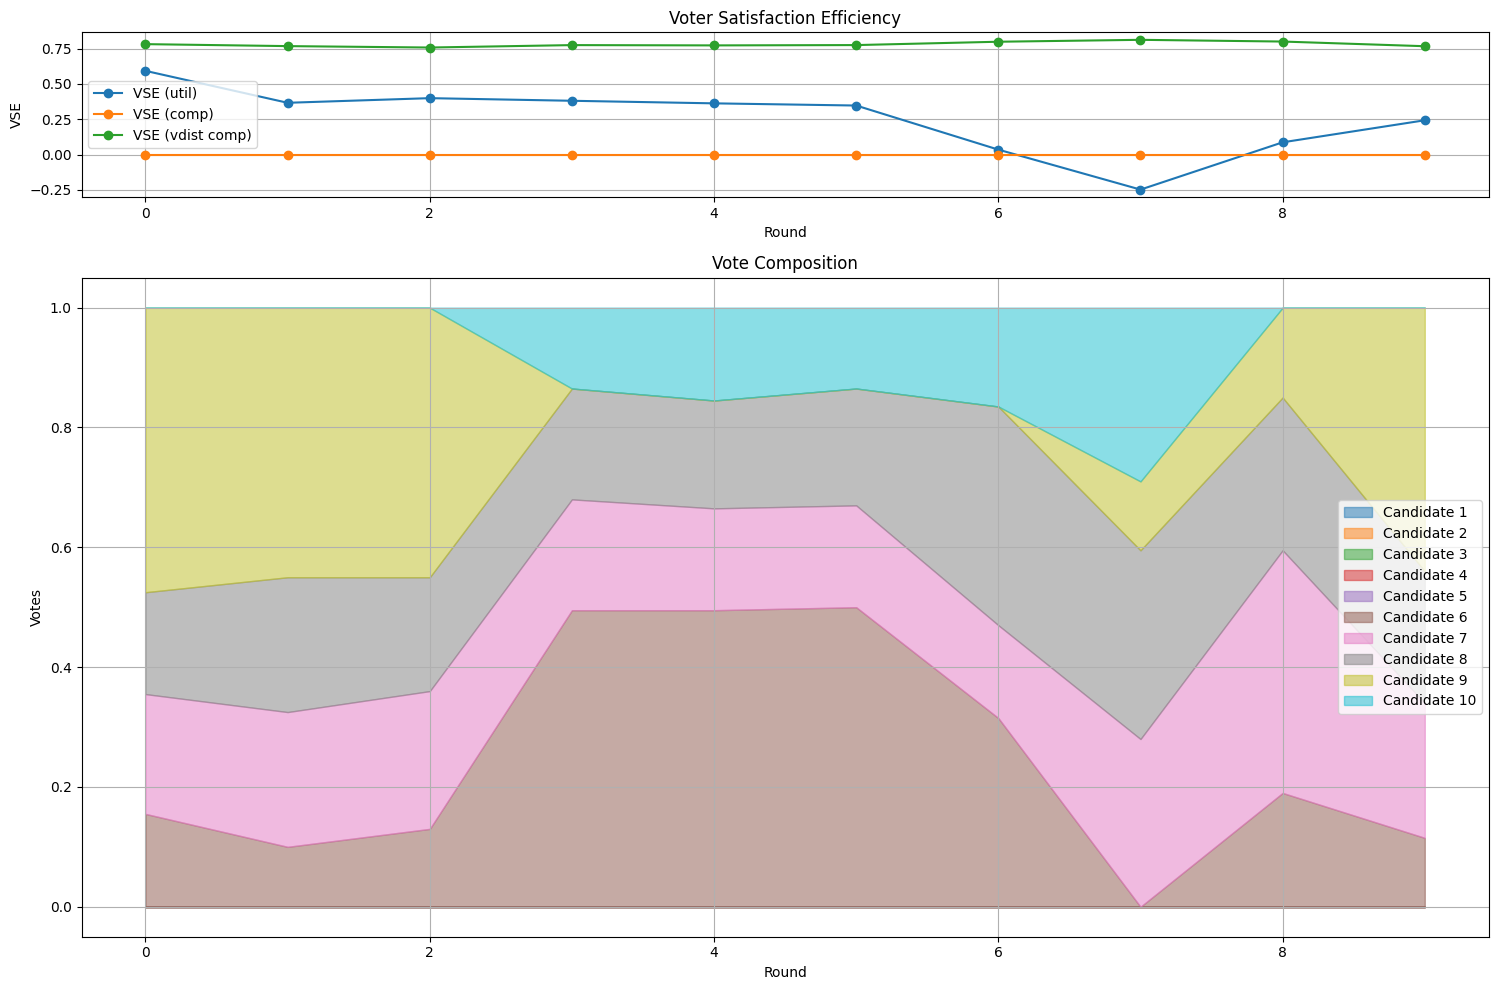

In [ ]:
plot_sim_dynamics(res_fptp[0], output_path="results_FPTP.png")